#### <i> Supply Chain Analysis And Forcasting In US Supply Chains </i>
#### <i> Import Library Files </i>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Now, you can run the rest of your code below, and warnings will be suppressed.


#### <i> Load The Dataset </i>

In [2]:
df = pd.read_csv("US_Regional_Sales_Data.csv")
df

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/2018,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7986,SO - 0008087,In-Store,WARE-MKL1006,26/9/20,30/12/20,7/1/2021,14/1/21,USD,9,41,339,29,1,0.08,$121.94,$234.50
7987,SO - 0008088,Online,WARE-NMK1003,26/9/20,30/12/20,2/1/2021,4/1/2021,USD,14,29,202,3,6,0.05,"$1,921.56","$3,202.60"
7988,SO - 0008089,Online,WARE-UHY1004,26/9/20,30/12/20,23/1/21,26/1/21,USD,14,32,241,35,5,0.20,"$2,792.76","$3,825.70"
7989,SO - 0008090,Online,WARE-NMK1003,26/9/20,30/12/20,20/1/21,25/1/21,USD,20,42,112,36,8,0.10,$804.00,"$1,072.00"


#### <i> Dataset Overview </i>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OrderNumber       7991 non-null   object 
 1   Sales Channel     7991 non-null   object 
 2   WarehouseCode     7991 non-null   object 
 3   ProcuredDate      7991 non-null   object 
 4   OrderDate         7991 non-null   object 
 5   ShipDate          7991 non-null   object 
 6   DeliveryDate      7991 non-null   object 
 7   CurrencyCode      7991 non-null   object 
 8   _SalesTeamID      7991 non-null   int64  
 9   _CustomerID       7991 non-null   int64  
 10  _StoreID          7991 non-null   int64  
 11  _ProductID        7991 non-null   int64  
 12  Order Quantity    7991 non-null   int64  
 13  Discount Applied  7991 non-null   float64
 14  Unit Cost         7991 non-null   object 
 15  Unit Price        7991 non-null   object 
dtypes: float64(1), int64(5), object(10)
memory

In [4]:
df.describe()

,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied
count,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000,7991.000000
mean,14.384307,25.457014,183.850081,23.771743,4.525341,0.115649
std,7.986086,14.414883,105.903946,13.526545,2.312631,0.085018
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.050000
25%,8.000000,13.000000,91.000000,12.000000,3.000000,0.050000
50%,14.000000,25.000000,183.000000,24.000000,5.000000,0.080000
75%,21.000000,38.000000,276.000000,36.000000,7.000000,0.150000
max,28.000000,50.000000,367.000000,47.000000,8.000000,0.400000


#### <i> DataSet Analysis And Visulizations </i>

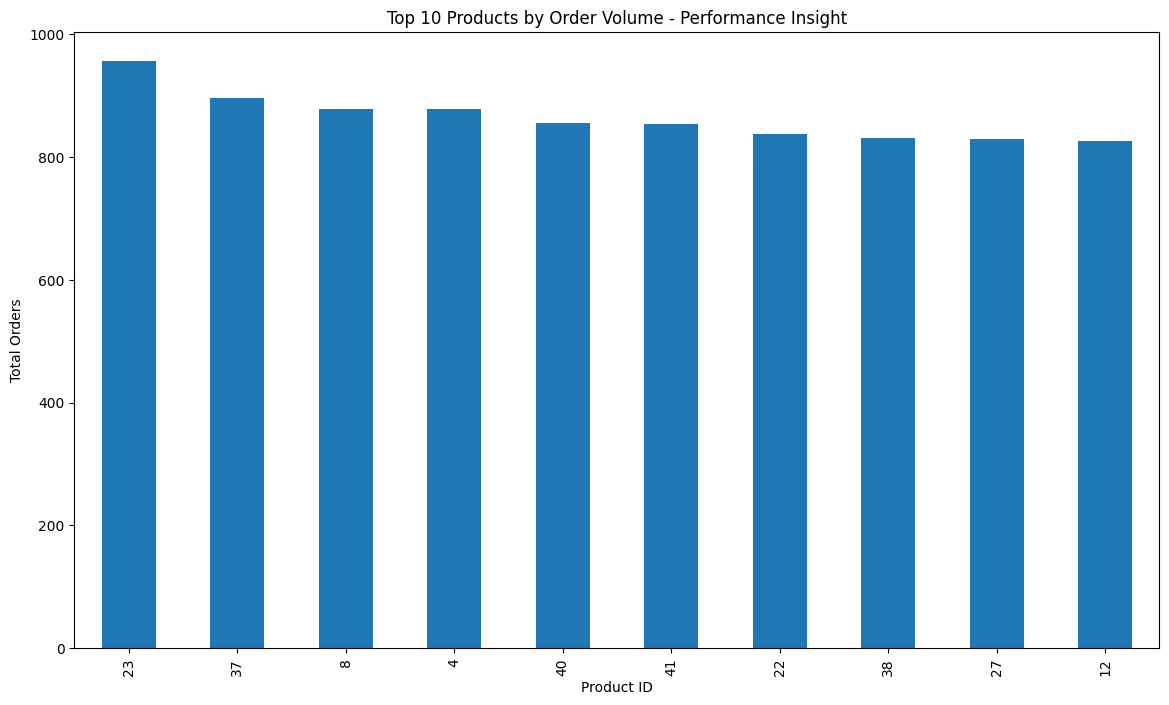

In [5]:
# Product Performance Insights
plt.figure(figsize=(14, 8))
product_sales = df.groupby('_ProductID')['Order Quantity'].sum().nlargest(10)
product_sales.plot(kind='bar')
plt.title('Top 10 Products by Order Volume - Performance Insight')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.show()

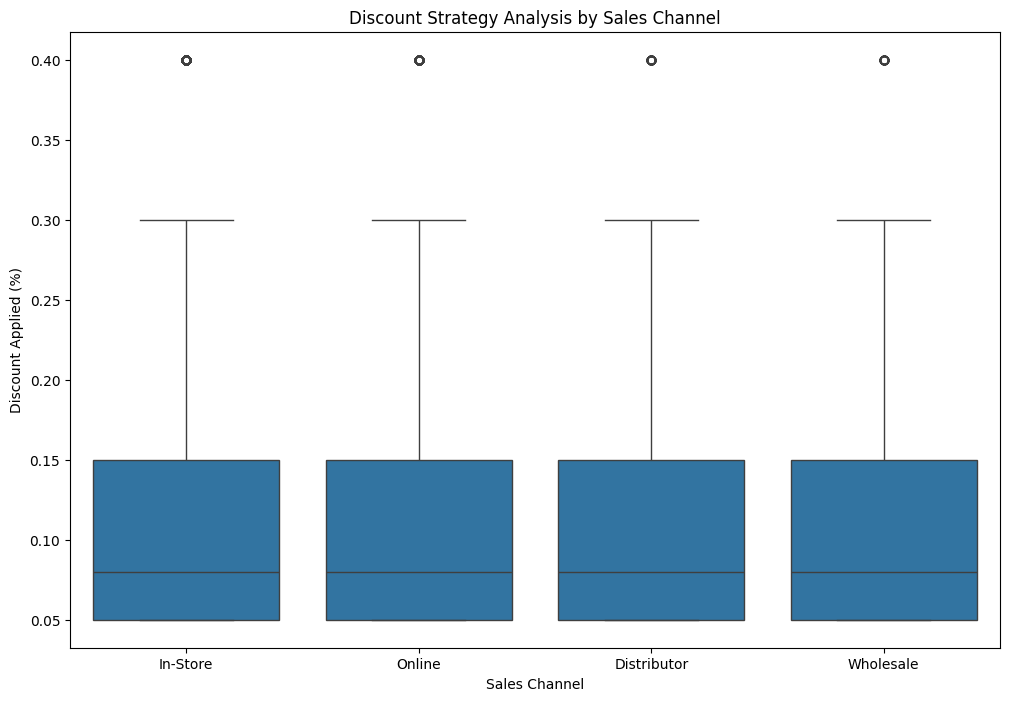

In [6]:
# Discount Strategy Insights
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Sales Channel', y='Discount Applied')
plt.title('Discount Strategy Analysis by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Discount Applied (%)')
plt.show()

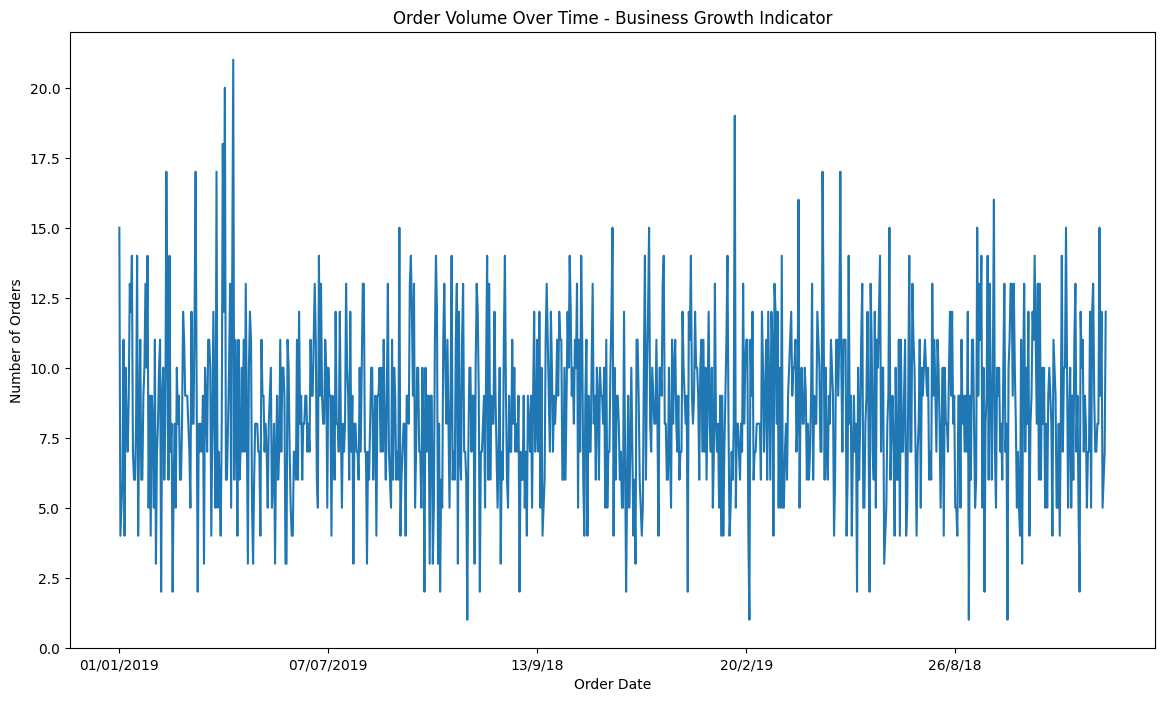

In [7]:
# Time-Series Analysis: Business Growth
plt.figure(figsize=(14, 8))
orders_by_date = df.groupby('OrderDate').size()
orders_by_date.plot()
plt.title('Order Volume Over Time - Business Growth Indicator')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.show()


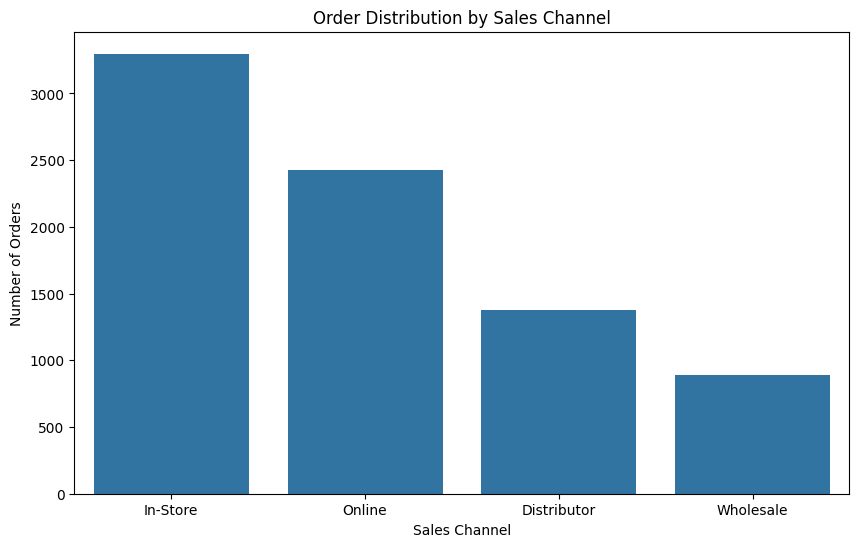

In [8]:
# Visual Analysis with Business Insights
# Sales Channel Analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sales Channel')
plt.title('Order Distribution by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Orders')
plt.show()


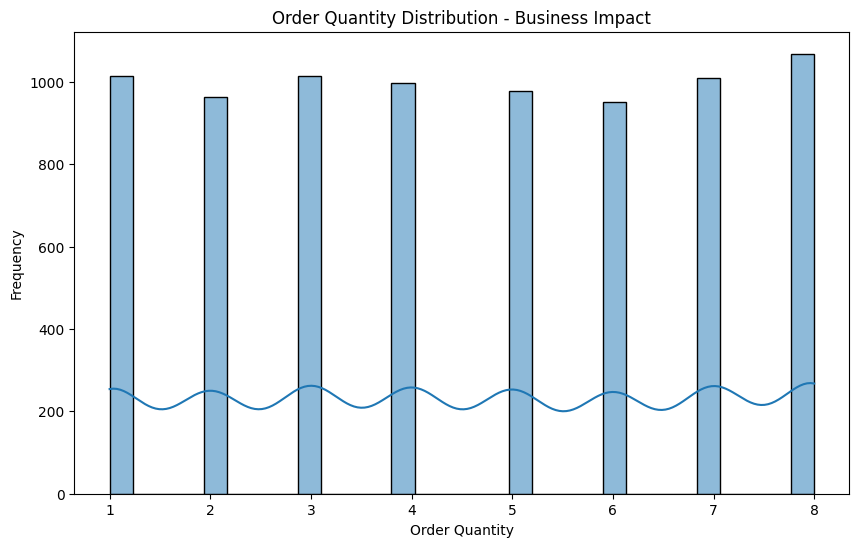

In [9]:
# Revenue Impact: Distribution of Order Quantity
plt.figure(figsize=(10, 6))
sns.histplot(df['Order Quantity'], bins=30, kde=True)
plt.title('Order Quantity Distribution - Business Impact')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

#### <i> DataSet Preprocessing </i>

In [10]:


# Convert date columns to datetime format
date_cols = ['ProcuredDate', 'OrderDate', 'ShipDate', 'DeliveryDate']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

# Clean currency columns
def clean_currency(value):
    return float(value.replace('$', '').replace(',', ''))

df['Unit Cost'] = df['Unit Cost'].apply(clean_currency)
df['Unit Price'] = df['Unit Price'].apply(clean_currency)

# Create new features
df['DeliveryDuration'] = (df['DeliveryDate'] - df['ShipDate']).dt.days
df['ProfitMargin'] = (df['Unit Price'] - df['Unit Cost']) * df['Order Quantity']
df['DiscountPercentage'] = (df['Discount Applied'] / df['Unit Price']) * 100

# Define target variable (classification)
df['OnTimeDelivery'] = (df['DeliveryDuration'] <= 5).astype(int)

# Encode categorical variables
cat_cols = ['Sales Channel', 'WarehouseCode', 'CurrencyCode']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Select features and target
X = df[['Sales Channel', 'WarehouseCode', '_SalesTeamID', '_CustomerID', '_StoreID', '_ProductID', 
        'Order Quantity', 'Discount Applied', 'Unit Cost', 'Unit Price', 'DeliveryDuration', 'ProfitMargin', 
        'DiscountPercentage']]
y = df['OnTimeDelivery']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



#### <i> Modeling </i>
#### <i> Random Forest Classifier </i>

In [11]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier:\n", classification_report(y_test, rf_predictions))
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.2f}\n")



Random Forest Classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       832

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599

Random Forest Accuracy: 1.00



#### <i> Logistic Regression </i>

In [12]:
# Train and evaluate Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, lr_predictions))
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.2f}\n")



Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93       767
           1       0.89      1.00      0.94       832

    accuracy                           0.94      1599
   macro avg       0.95      0.93      0.94      1599
weighted avg       0.94      0.94      0.94      1599

Logistic Regression Accuracy: 0.94



#### <i> Support Vector Classifier </i>

In [13]:
# Train and evaluate Support Vector Classifier
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
svc_predictions = svc_model.predict(X_test)
print("Support Vector Classifier:\n", classification_report(y_test, svc_predictions))
print(f"Support Vector Classifier Accuracy: {accuracy_score(y_test, svc_predictions):.2f}\n")

Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74       767
           1       0.74      0.91      0.82       832

    accuracy                           0.79      1599
   macro avg       0.81      0.78      0.78      1599
weighted avg       0.80      0.79      0.78      1599

Support Vector Classifier Accuracy: 0.79



#### <i > Comparison Of Models </i>

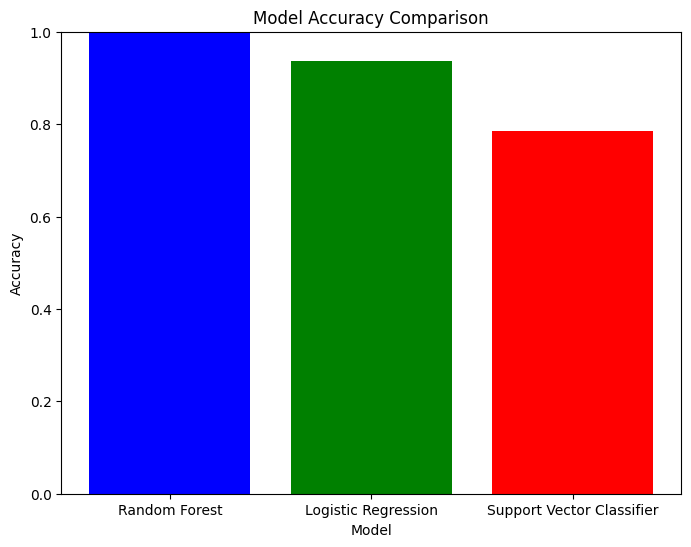

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each model
accuracies = [
    accuracy_score(y_test, rf_predictions),
    accuracy_score(y_test, lr_predictions),
    accuracy_score(y_test, svc_predictions)
]

# Model names
model_names = ['Random Forest', 'Logistic Regression', 'Support Vector Classifier']

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()
